### TP 5 : SVM linéaires

Les machines à vecteurs de support (SVM : Support Vector Machines) sont une classe de 
méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge 
(séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui 
peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données 
non séparables.
Les avantages des SVM :
  - Très efficaces en dimension élevée.
  - Ils sont aussi efficaces dans le cas où la dimension de l’espace est plus grande que le 
nombre d’échantillons d’apprentissage.
  - Pour la décision, n’utilisent pas tous les échantillons d’apprentissage, mais seulement 
une partie (les vecteurs de support). En conséquence, ces algorithmes demandent 
moins de mémoire.
Désavantages :
  - Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les 
performances sont moins bonnes.
  - Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent 
pas d’estimations de probabilités.

- Nous allons utiliser le jeu de données Diabétes,  Pour pouvoir afficher les résultats, on va utiliser seulement les premiers deux attributs (Pregnancies et Glucose).

In [336]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [3]:
diabetes=pd.read_csv('C:/Users/lenovo/Downloads/tp4_tp5/diabetes.csv')
X=diabetes.drop(['Outcome'],axis=1)
y=diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [10]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Nous pouvons maintenant entraîner une machine à vecteur de support linéaire 

#### cas du parametre C =1:

In [6]:
C=1
X = diabetes.iloc[:, :2].values
y = diabetes.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                    random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = svm.LinearSVC(C=C)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(cm)
acc_score

[[223  30]
 [ 69  62]]


0.7421875

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


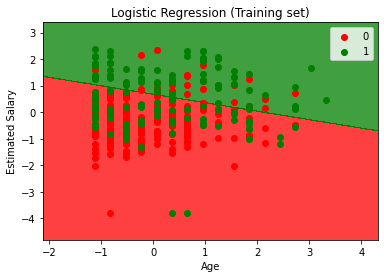

In [7]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1,step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
                                                  X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       253
           1       0.67      0.47      0.56       131

    accuracy                           0.74       384
   macro avg       0.72      0.68      0.69       384
weighted avg       0.73      0.74      0.73       384



- Nous avons obtenu des résultats intéréssante au niveau de precision qui depasse 74% .

##### Nous allons tester les différentes valeurs pour le paramètre C. Pour visuaiser 
Comment la frontière de décision évolue en fonction de C. 

In [13]:
X = diabetes.iloc[:, :2].values
y = diabetes.iloc[:, -1].values
ind=[]
liste_scr=[]

for i in range(1,100,5):
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.5, random_state = 0)

    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Fitting Logistic Regression to the Training set
    from sklearn.linear_model import LogisticRegression
    classifier = svm.LinearSVC(C=i)
    classifier.fit(X_train, y_train)
    #classifier.fit(X_train, y_train)
    ind.append(i)
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    liste_scr.append(acc_score)
    

Text(0, 0.5, ' Accuracy')

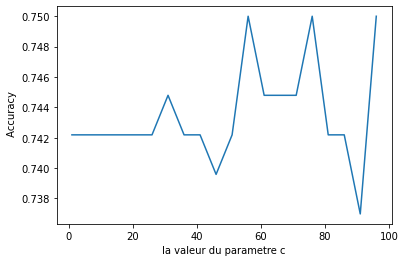

In [14]:
import matplotlib.pyplot as plt
plt.plot(ind,liste_scr)
plt.xlabel('la valeur du parametre c')
plt.ylabel(' Accuracy')

- ce qu'on peut visualiser d'aprés le graphe au dessus , qu'il ya pas de comportement stable , pour interpreter le changement de la valeur C , mais ce qu'on pourrait déduire , dans notre cas de jeu donnée degits , afin d'avoir la meilleur précision , il suffit de choisir une valeur parims les rois (60,80,90) pour le parametre C .

#### cas du parametre C =60 (solution optimale):

In [18]:
#C=40
c=60
X = diabetes.iloc[:, :2].values
y = diabetes.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.5, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = svm.LinearSVC(C=c)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(cm)
acc_score

[[227  26]
 [ 70  61]]


0.75

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


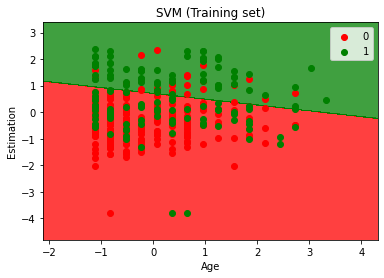

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
            stop = X_set[:, 0].max()+ 1, step = 0.01),
        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,
                               step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimation')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       253
           1       0.70      0.47      0.56       131

    accuracy                           0.75       384
   macro avg       0.73      0.68      0.69       384
weighted avg       0.74      0.75      0.73       384



* nous avons obtenu une meilleur précision qu'auparavant , une précision de 75% .

#### Remarque : 
D’après la visualisation au dessus, nous avons remarqué qu'on a une distribution des données non lineaire dificcile à séparer,ainsi que le modèle adopté nous a  paraît non adapté au problème .


- Pour l’instant, nous n’avons exploité que deux variables explicatives. Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est souvent plus facile de trouver des hyperplans séparateurs dans des espaces de grande dimension.

In [35]:
c=60
X = diabetes.iloc[:, :8].values
y = diabetes.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.5, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = svm.LinearSVC(C=c)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(cm)
acc_score

[[215  38]
 [ 49  82]]


0.7734375

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       253
           1       0.68      0.63      0.65       131

    accuracy                           0.77       384
   macro avg       0.75      0.74      0.74       384
weighted avg       0.77      0.77      0.77       384



* Nous avons obtenu un score plus elevé qu'auparavant , car nous avons entrainé notre modéle sur plus d'attributs , d'ou il a bien apprit,et il a bien généralisé .

#### Jeu de données Digits

Le jeu de données Digits est une collection d’images de chiffres manuscrits 
(nous l’avons déjà utilisé dans le TP sur les forêts aléatoires).

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [40]:
X_train.shape

(898, 64)

#####  cherchons la valeur de C , afin d'obtenir le meilleurs résultat de généralisation

In [42]:
indice=[]
acuu_liste=[]
for i in range(1,200,10):
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size = 0.5, random_state = 0)

    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Fitting Logistic Regression to the Training set
    from sklearn.linear_model import LogisticRegression
    classifier = svm.LinearSVC(C=i)
    classifier.fit(X_train, y_train)
    #classifier.fit(X_train, y_train)
    indice.append(i)
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    acuu_liste.append(acc_score)

Text(0, 0.5, ' Accuracy')

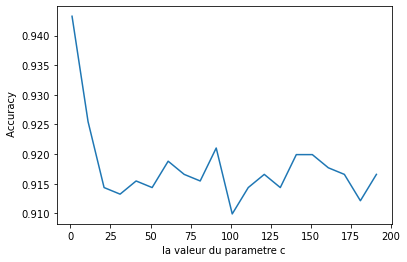

In [43]:
import matplotlib.pyplot as plt
plt.plot(indice,acuu_liste)
plt.xlabel('la valeur du parametre c')
plt.ylabel(' Accuracy')

* Concernant la valeur de c :
si on voulais une valeur maximale d'accuracy , il est de préférable de choisir une valeur entre [1,10]

In [46]:
#(valeur_optimal de c obtenue)
C=5
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
#classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print(cm)
acc_score

[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  86   0   0   0   1   0   0   3   0]
 [  0   0  92   0   0   0   0   0   0   0]
 [  0   0   0  92   0   0   0   0   1   0]
 [  0   0   0   0  76   0   0   0   0   0]
 [  0   0   0   0   0 104   1   0   0   3]
 [  0   1   0   0   1   0  87   0   0   0]
 [  0   0   0   0   1   0   0  77   0   0]
 [  0   2   1   2   1   0   1   1  83   1]
 [  0   0   0   3   0   3   0   0   0  86]]


0.9699666295884316

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      0.96      0.96        90
           2       0.99      1.00      0.99        92
           3       0.95      0.99      0.97        93
           4       0.96      1.00      0.98        76
           5       0.96      0.96      0.96       108
           6       0.98      0.98      0.98        89
           7       0.99      0.99      0.99        78
           8       0.95      0.90      0.93        92
           9       0.96      0.93      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

